## Initial setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce

TRAIN_FILE_PATH = "./data/train.csv"
TEST_FILE_PATH = "./data/test.csv"

# Read the file

In [2]:
df = pd.read_csv(TRAIN_FILE_PATH)

In [3]:
# Drop irrelevant columns
df = df.drop(columns=["PassengerId", "Name"])

In [4]:
# Clean data from empty strings
print(f"Number of rows before cleaning: {len(df)}")
df = df.replace("", pd.NA)
df = df.dropna()
print(f"Number of rows after cleaning: {len(df)}")


Number of rows before cleaning: 8693
Number of rows after cleaning: 6764


In [5]:
# Split the cabin column into deck and room
df[["cabin_letter", "cabin_id", "cabin_side"]] = df["Cabin"].str.split("/", expand=True)

# Drop the original cabin column
df = df.drop(columns=["Cabin"])


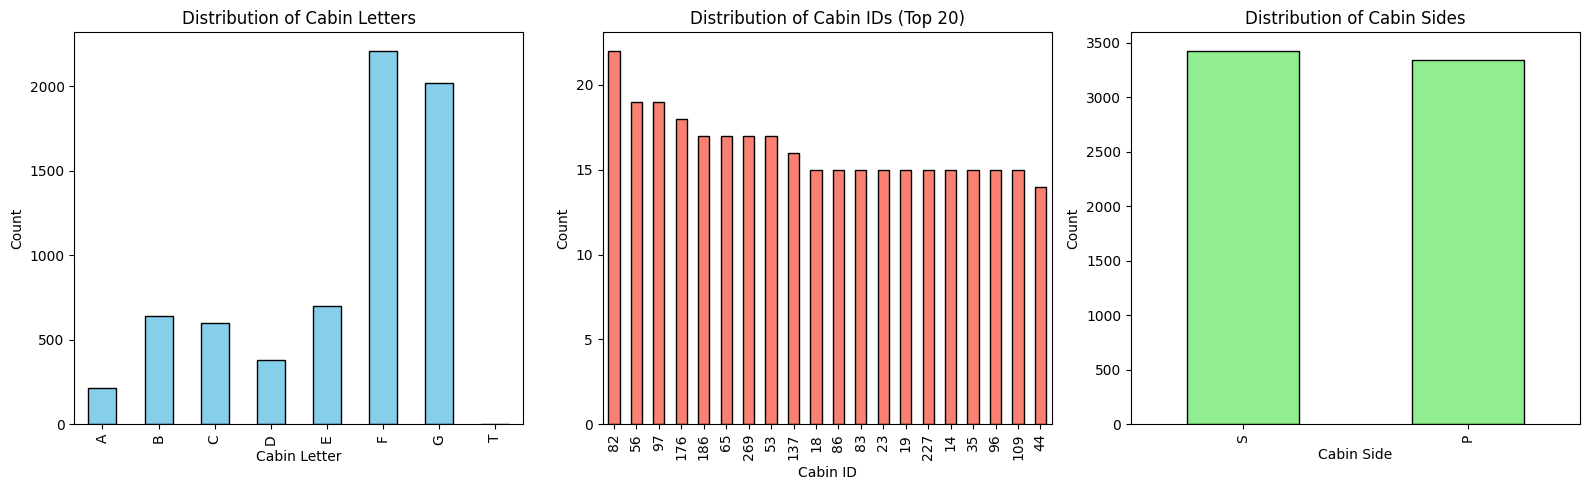

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Cabin Letter
df['cabin_letter'].value_counts().sort_index().plot(kind='bar', color='skyblue', edgecolor='black', ax=axes[0])
axes[0].set_title('Distribution of Cabin Letters')
axes[0].set_xlabel('Cabin Letter')
axes[0].set_ylabel('Count')

# Cabin ID (top 20 - too many unique values)
df['cabin_id'].value_counts().head(20).plot(kind='bar', color='salmon', edgecolor='black', ax=axes[1])
axes[1].set_title('Distribution of Cabin IDs (Top 20)')
axes[1].set_xlabel('Cabin ID')
axes[1].set_ylabel('Count')

# Cabin Side
df['cabin_side'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black', ax=axes[2])
axes[2].set_title('Distribution of Cabin Sides')
axes[2].set_xlabel('Cabin Side')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

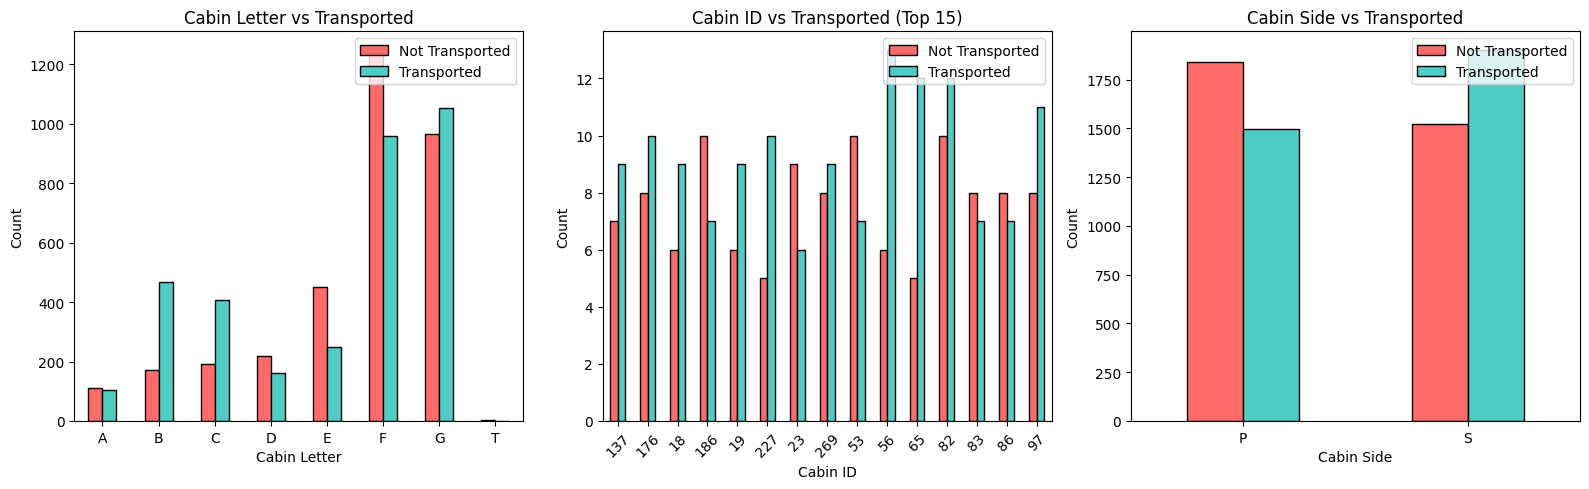


=== Transport Rates (within each category) ===

cabin_letter:
  B: 73.0% transported
  C: 67.8% transported
  G: 52.2% transported
  A: 48.4% transported
  F: 43.4% transported
  D: 42.5% transported
  E: 35.4% transported
  T: 33.3% transported

cabin_side:
  S: 55.5% transported
  P: 44.9% transported

=== Global Transport Rates (cabin_letter) ===
  G: 31.0% of all transported (1054/3401)
  F: 28.2% of all transported (959/3401)
  B: 13.8% of all transported (468/3401)
  C: 11.9% of all transported (406/3401)
  E: 7.3% of all transported (248/3401)
  D: 4.8% of all transported (162/3401)
  A: 3.0% of all transported (103/3401)
  T: 0.0% of all transported (1/3401)


In [7]:
# Cabin columns vs Transported (abducted)
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Cabin Letter vs Transported
cabin_letter_transport = df.groupby(['cabin_letter', 'Transported']).size().unstack(fill_value=0)
cabin_letter_transport.plot(kind='bar', stacked=False, ax=axes[0], color=['#ff6b6b', '#4ecdc4'], edgecolor='black')
axes[0].set_title('Cabin Letter vs Transported')
axes[0].set_xlabel('Cabin Letter')
axes[0].set_ylabel('Count')
axes[0].legend(['Not Transported', 'Transported'], loc='upper right')
axes[0].tick_params(axis='x', rotation=0)

# Cabin ID vs Transported (top 15 most common IDs)
top_ids = df['cabin_id'].value_counts().head(15).index
df_top_ids = df[df['cabin_id'].isin(top_ids)]
cabin_id_transport = df_top_ids.groupby(['cabin_id', 'Transported']).size().unstack(fill_value=0)
cabin_id_transport.plot(kind='bar', stacked=False, ax=axes[1], color=['#ff6b6b', '#4ecdc4'], edgecolor='black')
axes[1].set_title('Cabin ID vs Transported (Top 15)')
axes[1].set_xlabel('Cabin ID')
axes[1].set_ylabel('Count')
axes[1].legend(['Not Transported', 'Transported'], loc='upper right')
axes[1].tick_params(axis='x', rotation=45)

# Cabin Side vs Transported
cabin_side_transport = df.groupby(['cabin_side', 'Transported']).size().unstack(fill_value=0)
cabin_side_transport.plot(kind='bar', stacked=False, ax=axes[2], color=['#ff6b6b', '#4ecdc4'], edgecolor='black')
axes[2].set_title('Cabin Side vs Transported')
axes[2].set_xlabel('Cabin Side')
axes[2].set_ylabel('Count')
axes[2].legend(['Not Transported', 'Transported'], loc='upper right')
axes[2].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

# Print transport rates
print("\n=== Transport Rates (within each category) ===")
for col in ['cabin_letter', 'cabin_side']:
    print(f"\n{col}:")
    rates = df.groupby(col)['Transported'].mean().sort_values(ascending=False)
    for idx, rate in rates.items():
        print(f"  {idx}: {rate:.1%} transported")

# Global transport rates for cabin letters
print("\n=== Global Transport Rates (cabin_letter) ===")
total_transported = df['Transported'].sum()
transported_by_letter = df[df['Transported'] == True].groupby('cabin_letter').size()
global_rates = (transported_by_letter / total_transported).sort_values(ascending=False)
for letter, rate in global_rates.items():
    count = transported_by_letter[letter]
    print(f"  {letter}: {rate:.1%} of all transported ({count}/{total_transported})")


In [8]:
# Remove Cabin side as it does not have any correlation with abducted
df = df.drop(columns=["cabin_side"])

# Remove cabin_id as this info is already in cabin_letter
df = df.drop(columns=["cabin_id"])

df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_letter
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F


In [9]:
# Convert categorical columns to numeric using category_encoders

# Define categorical columns
categorical_cols = ['HomePlanet', 'Destination', 'cabin_letter']
binary_cols = ['VIP', 'CryoSleep', 'Transported']

# Use OrdinalEncoder for categorical columns (converts to numeric based on order)
ordinal_encoder = ce.OrdinalEncoder(cols=categorical_cols)
df = ordinal_encoder.fit_transform(df)

print(df.head())

# Convert binary columns to 0/1
for col in binary_cols:
    df[col] = df[col].astype(int)

# Display the mappings
print("Ordinal Encoder Mappings:")
for mapping in ordinal_encoder.mapping:
    print(f"\n{mapping['col']}:")
    for orig, encoded in zip(mapping['mapping'].index, mapping['mapping'].values):
        if pd.notna(orig):
            print(f"  {orig} -> {encoded}")

print("\nDataFrame after encoding:")
df.head()

   HomePlanet CryoSleep  Destination   Age    VIP  RoomService  FoodCourt  \
0           1     False            1  39.0  False          0.0        0.0   
1           2     False            1  24.0  False        109.0        9.0   
2           1     False            1  58.0   True         43.0     3576.0   
3           1     False            1  33.0  False          0.0     1283.0   
4           2     False            1  16.0  False        303.0       70.0   

   ShoppingMall     Spa  VRDeck  Transported  cabin_letter  
0           0.0     0.0     0.0        False             1  
1          25.0   549.0    44.0         True             2  
2           0.0  6715.0    49.0        False             3  
3         371.0  3329.0   193.0        False             3  
4         151.0   565.0     2.0         True             2  
Ordinal Encoder Mappings:

HomePlanet:
  Europa -> 1
  Earth -> 2
  Mars -> 3

Destination:
  TRAPPIST-1e -> 1
  PSO J318.5-22 -> 2
  55 Cancri e -> 3

cabin_letter:
  B -

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_letter
0,1,0,1,39.0,0,0.0,0.0,0.0,0.0,0.0,0,1
1,2,0,1,24.0,0,109.0,9.0,25.0,549.0,44.0,1,2
2,1,0,1,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,3
3,1,0,1,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,3
4,2,0,1,16.0,0,303.0,70.0,151.0,565.0,2.0,1,2


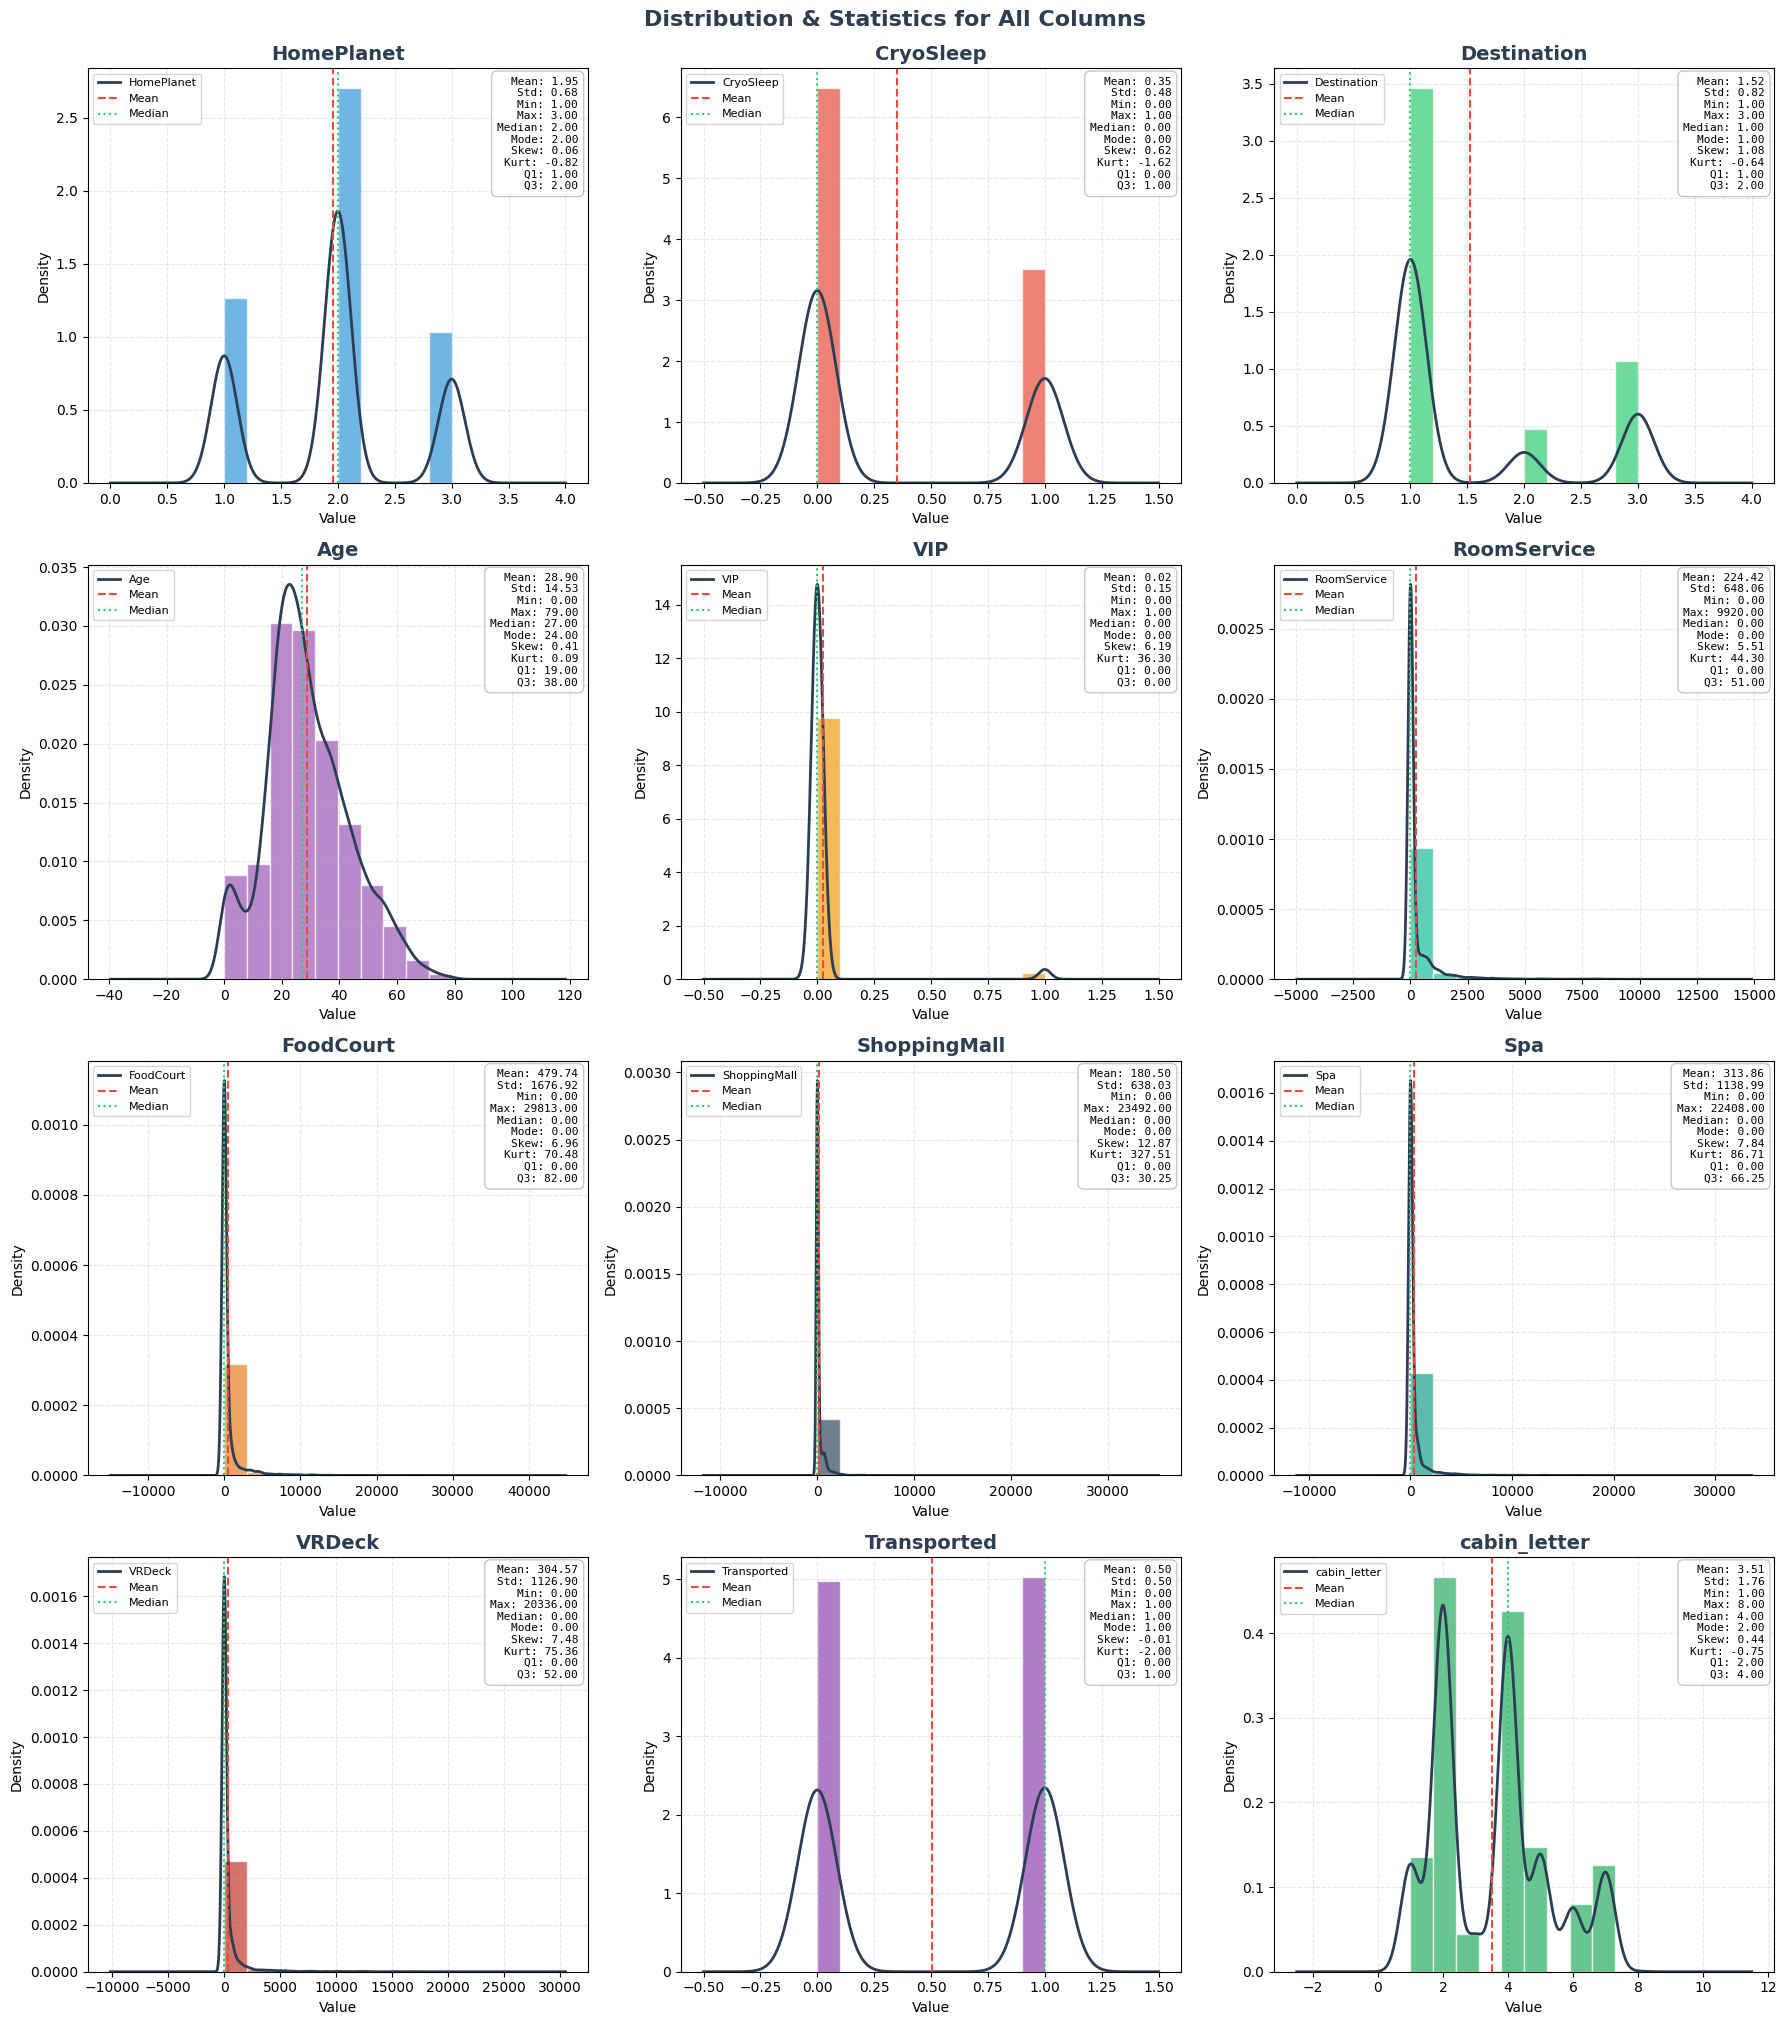

In [10]:
# Visualize statistics for each column in a matrix of charts
n_cols = len(df.columns)
n_rows = (n_cols + 2) // 3  # 3 charts per row

fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5 * n_rows))
axes = axes.flatten()

colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6', '#f39c12', '#1abc9c', '#e67e22', '#34495e', '#16a085', '#c0392b', '#8e44ad', '#27ae60']

for i, col in enumerate(df.columns):
    ax = axes[i]
    color = colors[i % len(colors)]
    
    # Plot histogram with KDE
    ax.hist(df[col], bins=10, color=color, alpha=0.7, edgecolor='white', density=True)
    df[col].plot(kind='kde', ax=ax, color='#2c3e54', linewidth=2)
    
    # Calculate statistics
    stats = {
        'Mean': df[col].mean(),
        'Std': df[col].std(),
        'Min': df[col].min(),
        'Max': df[col].max(),
        'Median': df[col].median(),
        'Mode': df[col].mode().iloc[0],
        'Skew': df[col].skew(),
        'Kurt': df[col].kurt(),
        'Q1': df[col].quantile(0.25),
        'Q3': df[col].quantile(0.75)
    }
    
    # Create stats text box
    stats_text = (
        f"Mean: {stats['Mean']:.2f}\n"
        f"Std: {stats['Std']:.2f}\n"
        f"Min: {stats['Min']:.2f}\n"
        f"Max: {stats['Max']:.2f}\n"
        f"Median: {stats['Median']:.2f}\n"
        f"Mode: {stats['Mode']:.2f}\n"
        f"Skew: {stats['Skew']:.2f}\n"
        f"Kurt: {stats['Kurt']:.2f}\n"
        f"Q1: {stats['Q1']:.2f}\n"
        f"Q3: {stats['Q3']:.2f}"
    )
    
    # Add text box with statistics
    props = dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9, edgecolor='#bdc3c7')
    ax.text(0.98, 0.98, stats_text, transform=ax.transAxes, fontsize=8,
            verticalalignment='top', horizontalalignment='right', bbox=props, family='monospace')
    
    # Add vertical lines for mean and median
    ax.axvline(stats['Mean'], color='#e74c3c', linestyle='--', linewidth=1.5, label='Mean')
    ax.axvline(stats['Median'], color='#2ecc71', linestyle=':', linewidth=1.5, label='Median')
    
    ax.set_title(col, fontsize=14, fontweight='bold', color='#2c3e50')
    ax.set_xlabel('Value', fontsize=10)
    ax.set_ylabel('Density', fontsize=10)
    ax.legend(loc='upper left', fontsize=8)
    ax.grid(True, alpha=0.3, linestyle='--')

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.suptitle('Distribution & Statistics for All Columns', fontsize=16, fontweight='bold', y=1.01, color='#2c3e50')
plt.show()



In [11]:
from sklearn.model_selection import train_test_split


# Split the data into X and Y
X = df.drop(columns=["Transported"])
y = df["Transported"]

# Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
from xgboost import XGBClassifier   
from lightgbm import LGBMClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score 

models = []

models.append(("xgb",XGBClassifier()))
models.append(("xgbgblinear",XGBClassifier(booster="gblinear")))
models.append(("LGBM",LGBMClassifier()))

print(models)

results = {}

for  name, model in models:
    skf = StratifiedKFold(n_splits = 5, random_state=None)
    cv_results = cross_val_score(model,X_train,y_train,cv=skf, scoring="accuracy")
    results[name]= (cv_results.mean(), cv_results.std())

print("name     results.mean     results.std")

for key,value in results.items():
    print(key,value)

[('xgb', XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)), ('xgbgblinear', XGBClassifier(base_score=None, booster='gblinear', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
      

In [14]:
from sklearn.model_selection import GridSearchCV

lgbmc = LGBMClassifier()


lgbm_params = {"n_estimators":[100,200,300], 
               "learning_rate":[0.01,0.05,0.1,0.3],
               "num_leaves":[20,50,80,100]}

grid_search = GridSearchCV (estimator = lgbmc,
                            param_grid = lgbm_params,
                            n_jobs=-1,
                            cv = 5,
                            scoring="accuracy",
                           error_score='raise')

grid_result = grid_search.fit(X_train, y_train)


final_model = lgbmc.set_params(**grid_result.best_params_)




[LightGBM] [Info] Number of positive: 2197, number of negative: 2132
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001399 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1372
[LightGBM] [Info] Number of data points in the train set: 4329, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507508 -> initscore=0.030032
[LightGBM] [Info] Start training from score 0.030032
[LightGBM] [Info] Number of positive: 2198, number of negative: 2131
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004083 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1373
[LightGBM] [Info] Number of data points in the train set: 4329, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507739 -> initscore=0.030957
[LightGBM] 

In [16]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, f1_score


#training the model
final_model.fit(X_train, y_train)

#predictions
y_pred = final_model.predict(X_test)


precision = precision_score(y_pred, y_test)
accuracy = accuracy_score(y_pred, y_test)
recall = precision_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)

score = []
score.append(("precision", precision))
score.append(("accuracy",accuracy))
score.append(("recall",recall))
score.append(("f1",f1))

score= pd.DataFrame(score)
score.rename(columns={0: "Metric", 1:"Result"}, inplace=True)

display(score)

[LightGBM] [Info] Number of positive: 2747, number of negative: 2664
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000625 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1373
[LightGBM] [Info] Number of data points in the train set: 5411, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.507670 -> initscore=0.030681
[LightGBM] [Info] Start training from score 0.030681


,Metric,Result
0,precision,0.819572
1,accuracy,0.794531
2,recall,0.819572
3,f1,0.794074


In [ ]:
## Run on competition test data

test_df = pd.read_csv(TEST_FILE_PATH)

test_df = test_df.drop(columns=["PassengerId", "Name"])
# Split the cabin column into deck and room
test_df[["cabin_letter", "cabin_id", "cabin_side"]] = test_df["Cabin"].str.split("/", expand=True)

# Drop the original cabin column
test_df = test_df.drop(columns=["Cabin", "cabin_id", "cabin_side"])

test_df["Transported"] = 0

test_df.head()

test_df = ordinal_encoder.transform(test_df)

# Convert binary columns to 0/1
for col in binary_cols:
    try:
        test_df[col] = test_df[col].astype(int)
    except:
        test_df[col] = 0


print("\nDataFrame after encoding:")

test_df.head()

test_df = test_df.drop(columns=["Transported"])


y_pred = final_model.predict(test_df)

display(y_pred)






DataFrame after encoding:


array([0, 0, 1, ..., 1, 1, 0], shape=(4277,))